In [338]:
from datetime import datetime, timedelta
from sqlmodel import Field, Relationship, SQLModel, Session, create_engine, select, col

CYCLE_TIME = 6      # times in hours
db_name = "beboundless_data.db"
sqlite_url = f"sqlite:///{db_name}"
engine = create_engine(sqlite_url)

In [339]:
from beboundless_data_db import Requestors, Orders

one_hour_ago = int((datetime.now() - timedelta(hours=CYCLE_TIME)).timestamp())
with Session(engine) as session:
    statement = select(Requestors).where(Requestors.last_activity >= one_hour_ago)
    results: list[Requestors] = session.exec(statement).all()

address = [r.address for r in results if r.address]
print(address)

data_dict = {}
with Session(engine) as session:
    for addr in address:
        statement = select(Orders).where(
            Orders.created >= one_hour_ago,
            Orders.requestor_address == addr,
            Orders.lock_gas_price != None
        )
        orders = session.exec(statement).all()
        data_dict[addr] = [(order.order_id, order.created, order.lock_txn, order.lock_gas_price) for order in orders if order.lock_gas_price]
print(data_dict)

['0x2546c553d857d20658ece248f7c7d0861a240681', '0xc2db89b2bd434ceac6c74fbc0b2ad3a280e66db0', '0x89f12aba0bcda3e708b1129eb2557b96f57b0de6', '0x734df7809c4ef94da037449c287166d114503198', '0xc73c222d7d39778bf9212f23a8f4356ff7c1e77f', '0xf353bda16a83399c11e09615ee7ac326a5a08ccf']
{'0x2546c553d857d20658ece248f7c7d0861a240681': [('0x2546c553d857d20658ece248f7c7d0861a240681b85e9861', 1756877214, '0xd586ae98e788aca507695437df7ac13e1689c1cbc797fc41cb03c654080414ff', 0.129229661), ('0x2546c553d857d20658ece248f7c7d0861a24068102f9a705', 1756877202, '0x5c034d0842604a250a9be4d38a142a81c82845800ef5dbf844a945d5c8fb01db', 0.136719269), ('0x2546c553d857d20658ece248f7c7d0861a2406815c8909b9', 1756877191, '0x2f53e0b7c785ce80386013bddecbaa831ce44c81a04546686746c6bd2e10caaf', 0.150161079), ('0x2546c553d857d20658ece248f7c7d0861a2406819452f672', 1756877179, '0x6da2aa83627db5ed21aeabade7b78c5249636544ee7ce757a7b33e08bec7fc41', 0.135304906), ('0x2546c553d857d20658ece248f7c7d0861a240681687212e4', 1756877168, '0x1

In [340]:
# blacklist = [
#     "0x734df7809c4ef94da037449c287166d114503198",
#     # "0x89f12aba0bcda3e708b1129eb2557b96f57b0de6"
# ]
# data_dict = {addr: orders for addr, orders in data_dict.items() if addr not in blacklist}

whitelist = [
    "0x2546c553d857d20658ece248f7c7d0861a240681",
    "0xc2db89b2bd434ceac6c74fbc0b2ad3a280e66db0",
]
data_dict = {addr: orders for addr, orders in data_dict.items() if addr in whitelist}

print(data_dict)
if not data_dict:
    raise SystemExit("No data found")

{'0x2546c553d857d20658ece248f7c7d0861a240681': [('0x2546c553d857d20658ece248f7c7d0861a240681b85e9861', 1756877214, '0xd586ae98e788aca507695437df7ac13e1689c1cbc797fc41cb03c654080414ff', 0.129229661), ('0x2546c553d857d20658ece248f7c7d0861a24068102f9a705', 1756877202, '0x5c034d0842604a250a9be4d38a142a81c82845800ef5dbf844a945d5c8fb01db', 0.136719269), ('0x2546c553d857d20658ece248f7c7d0861a2406815c8909b9', 1756877191, '0x2f53e0b7c785ce80386013bddecbaa831ce44c81a04546686746c6bd2e10caaf', 0.150161079), ('0x2546c553d857d20658ece248f7c7d0861a2406819452f672', 1756877179, '0x6da2aa83627db5ed21aeabade7b78c5249636544ee7ce757a7b33e08bec7fc41', 0.135304906), ('0x2546c553d857d20658ece248f7c7d0861a240681687212e4', 1756877168, '0x15bfa5751f9418d343d6274ff1b3c190ddc7399e640aa456fffc4d4753549ac7', 0.500700842), ('0x2546c553d857d20658ece248f7c7d0861a240681d046960c', 1756877157, '0xb7c560f0fb9ccb28ba7e20c286a127636ab3e531078ca8b8832b94eb4827978f', 0.001202985), ('0x2546c553d857d20658ece248f7c7d0861a240681b2

Group stats:
                                      address  count      mean       std  \
0  0x2546c553d857d20658ece248f7c7d0861a240681   1472  0.217759  0.222003   
1  0xc2db89b2bd434ceac6c74fbc0b2ad3a280e66db0   1330  0.561872  0.513414   

        min       max    median       q25       q75 best_range  
0  0.000118  0.900492  0.129198  0.032072  0.500000  0.03~0.50  
1  0.001829  1.200962  0.523969  0.067361  1.200461  0.07~1.20  
Good suppliers:
                                      address  count      mean       std  \
0  0x2546c553d857d20658ece248f7c7d0861a240681   1472  0.217759  0.222003   
1  0xc2db89b2bd434ceac6c74fbc0b2ad3a280e66db0   1330  0.561872  0.513414   

        min       max    median       q25       q75 best_range  
0  0.000118  0.900492  0.129198  0.032072  0.500000  0.03~0.50  
1  0.001829  1.200962  0.523969  0.067361  1.200461  0.07~1.20  
Gas price boxplot:


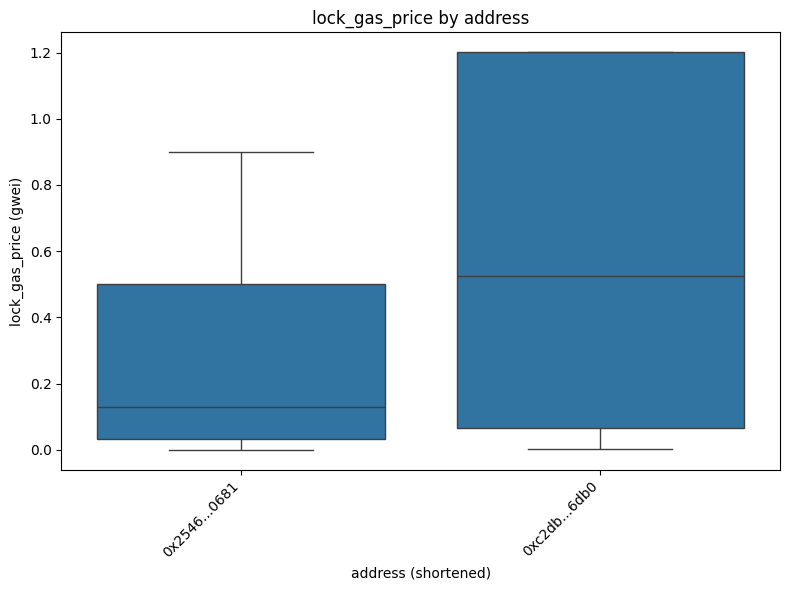

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame([
    {"address": addr, "order_id": oid, "created": created, "lock_txn": txn, "lock_gas_price": float(gas)}
    for addr, lst in data_dict.items()
    for oid, created, txn, gas in lst
])

# set timezone +8
df["created"] = pd.to_datetime(df["created"] + 8 * 3600, unit="s")

from dc_view import plot_gas_price_boxplot, compute_gas_group_stats, filter_good_suppliers

print("Group stats:")
group_stats = compute_gas_group_stats(df)
print(group_stats)

print("Good suppliers:")
good = filter_good_suppliers(group_stats, min_count=10, max_std=5)
print(good)

print("Gas price boxplot:")
plot_gas_price_boxplot(df)

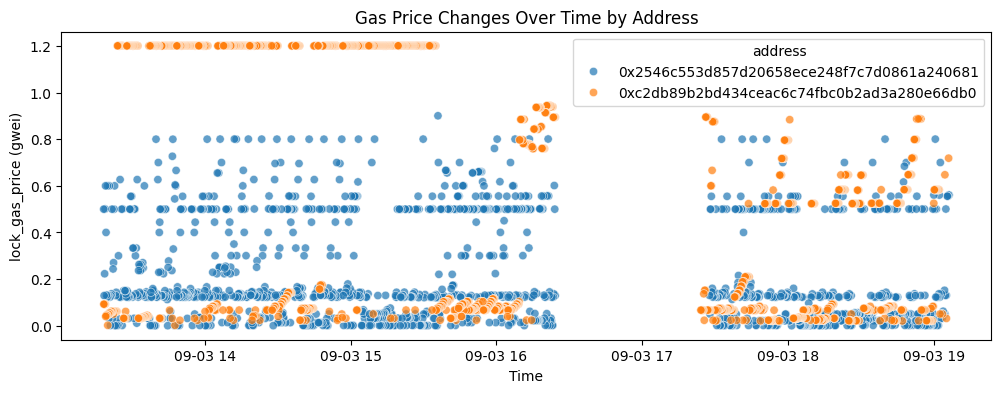

In [342]:
df["created_dt"] = pd.to_datetime(df["created"], unit="s")
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x="created_dt", y="lock_gas_price", hue="address", alpha=0.7)
plt.title("Gas Price Changes Over Time by Address")
plt.xlabel("Time")
plt.ylabel("lock_gas_price (gwei)")
plt.show()

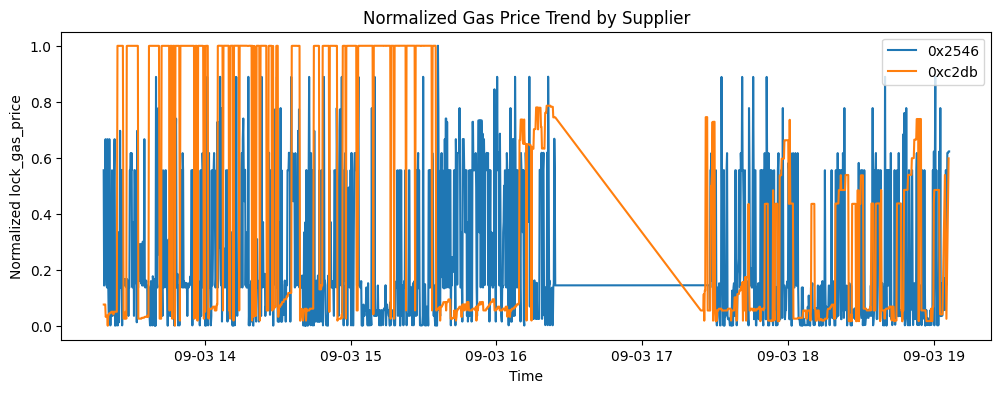

In [343]:
plt.figure(figsize=(12, 4))
for addr, group in df.groupby("address"):
    group = group.sort_values("created_dt")
    norm = (group["lock_gas_price"] - group["lock_gas_price"].min()) / (group["lock_gas_price"].max() - group["lock_gas_price"].min())
    plt.plot(group["created_dt"], norm, label=addr[:6])
plt.legend()
plt.title("Normalized Gas Price Trend by Supplier")
plt.xlabel("Time")
plt.ylabel("Normalized lock_gas_price")
plt.show()

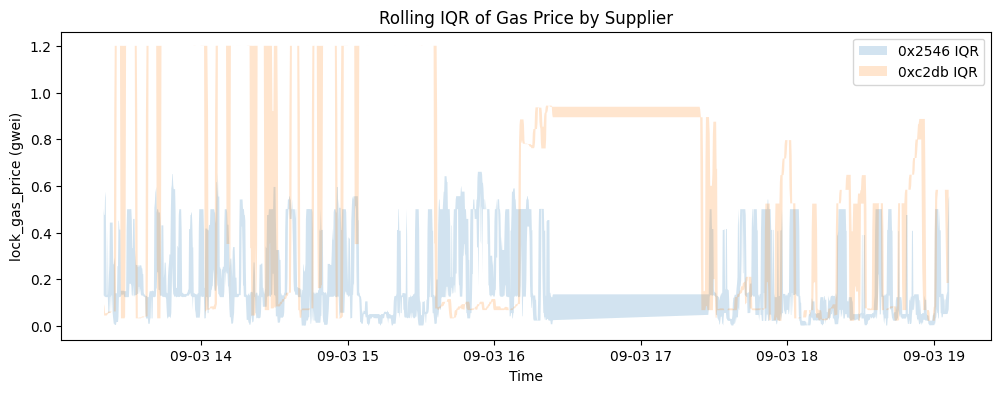

In [344]:
window = 10
plt.figure(figsize=(12, 4))
for addr, group in df.groupby("address"):
    group = group.sort_values("created_dt")
    rolling_q25 = group["lock_gas_price"].rolling(window).quantile(0.25)
    rolling_q75 = group["lock_gas_price"].rolling(window).quantile(0.75)
    plt.fill_between(group["created_dt"], rolling_q25, rolling_q75, alpha=0.2, label=f"{addr[:6]} IQR")
plt.legend()
plt.title("Rolling IQR of Gas Price by Supplier")
plt.xlabel("Time")
plt.ylabel("lock_gas_price (gwei)")
plt.show()


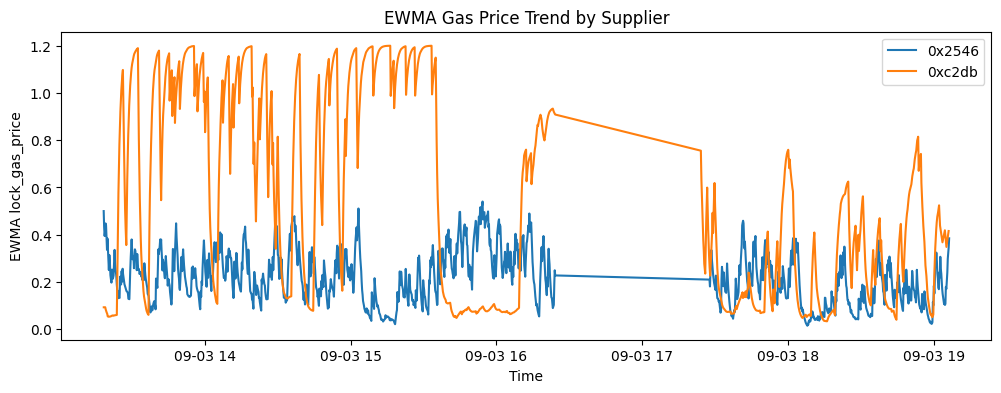

In [345]:
plt.figure(figsize=(12, 4))
for addr, group in df.groupby("address"):
    group = group.sort_values("created_dt")
    ewma = group["lock_gas_price"].ewm(span=10, adjust=False).mean()
    plt.plot(group["created_dt"], ewma, label=addr[:6])
plt.legend()
plt.title("EWMA Gas Price Trend by Supplier")
plt.xlabel("Time")
plt.ylabel("EWMA lock_gas_price")
plt.show()
